In [1]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

In [13]:
# ========= GLOBALS ==========

gridsize = 35
cmap = sns.cubehelix_palette(4, as_cmap=True)
frame_interval = 25

In [3]:
def increment(grid, x, y):
    g = grid.copy()
    
    g[x][y] += 1
    
    if g[x][y] >= 4:
        g[x][y] = 0
        bordering_cells = neighbors(x, y)
        
        for cell in bordering_cells:
            g = increment(g, cell[0], cell[1])
    
    return g

In [4]:
def neighbors(x,y):
    dirs = [(x-1,y), (x+1,y), (x, y-1), (x, y+1)]
    neighbors = []
    
    for d in dirs:
        if (d[0] >= 0 and d[0] < gridsize) and (d[1] >= 0 and d[1] < gridsize):
            neighbors.append(d)
            
    return neighbors

In [14]:
def frame(history):
    def func(i):
        frame = plt.imshow(
                history[:, :, i*frame_interval], vmax=3, extent=(0, gridsize, 0, gridsize), cmap=cmap)
        return frame
    return func

def animate_history(history, path):
    num_frames = int(history.shape[2]/frame_interval)
    
    Writer = animation.writers["ffmpeg"]
    writer = Writer(fps=30, bitrate=900)
    
    fig = plt.figure(figsize=(10,6))
    plt.title('Abelian Sandpile')
    plt.xticks([])
    plt.yticks([])
        
    ani = animation.FuncAnimation(fig, frame(history), frames=num_frames)
    ani.save(path, writer=writer)

In [6]:
grid = np.array([[0 for i in range(gridsize)] for i in range(gridsize)])
history = np.expand_dims(grid.copy(), axis=2)

In [7]:
for _ in range(5000):
    x = int(gridsize/2) #r.randint(0, gridsize-1)
    y = int(gridsize/2) #r.randint(0, gridsize-1)
    grid = increment(grid, x, y)
    
    history = np.append(history, np.expand_dims(grid.copy(), axis=2), axis=2)
    
grid

array([[2, 1, 3, ..., 3, 1, 2],
       [1, 2, 2, ..., 2, 2, 1],
       [3, 2, 2, ..., 2, 2, 3],
       ...,
       [3, 2, 2, ..., 2, 2, 3],
       [1, 2, 2, ..., 2, 2, 1],
       [2, 1, 3, ..., 3, 1, 2]])

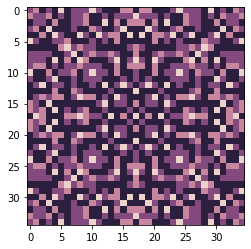

In [11]:
plt.imshow(grid, cmap=cmap)

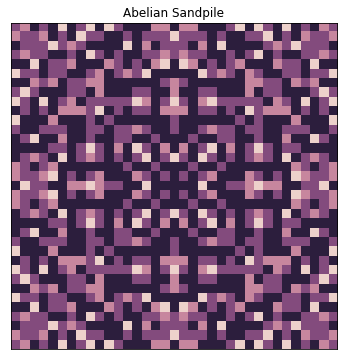

In [15]:
animate_history(history, "videos/sandpile_2.mp4")